## My objective is to build a predictive model that can classify whether a passenger survived or not based on the available features.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

## Data exploration

In [120]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [121]:
train.shape

(891, 12)

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
train.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace= True, axis = 1)
test.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace= True, axis = 1)

To check Null values

In [124]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [125]:
print(test.keys())

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [126]:
train.describe()

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [127]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


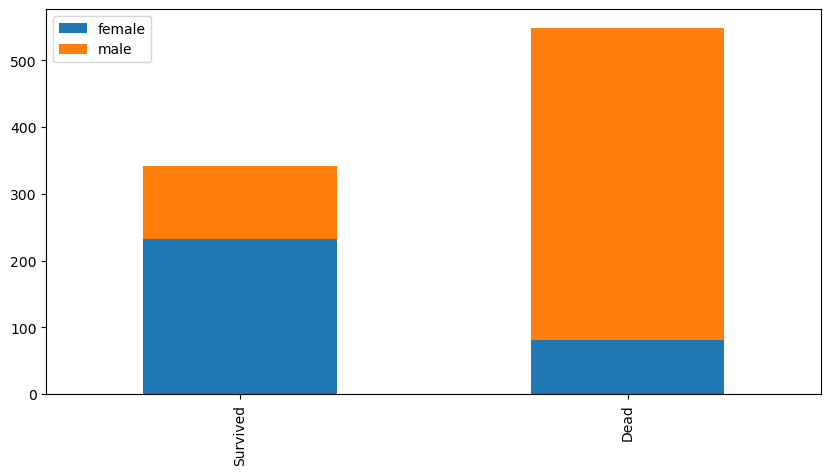

In [128]:
bar_chart('Sex')
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


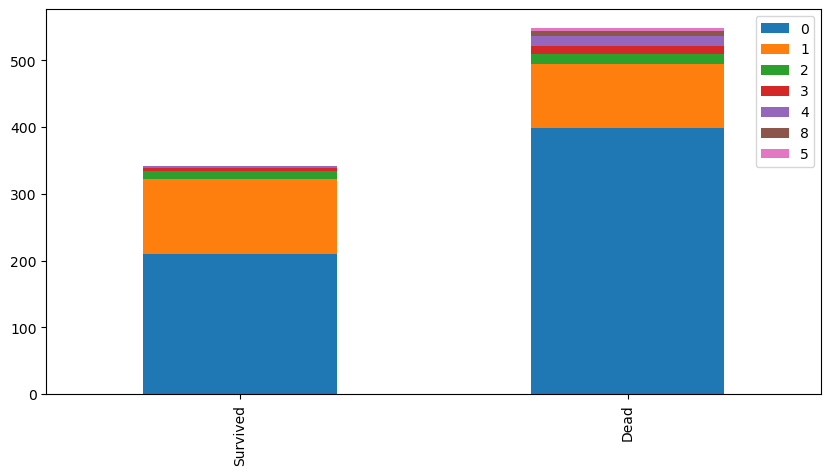

In [129]:
bar_chart('SibSp')
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


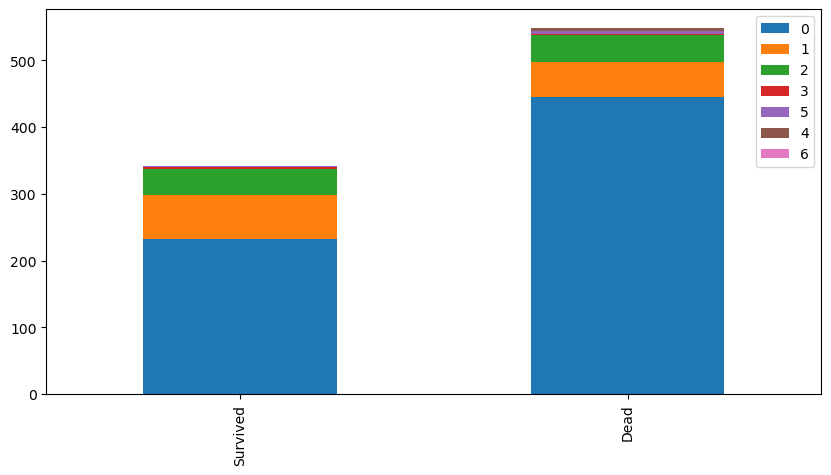

In [130]:
bar_chart('Parch')
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


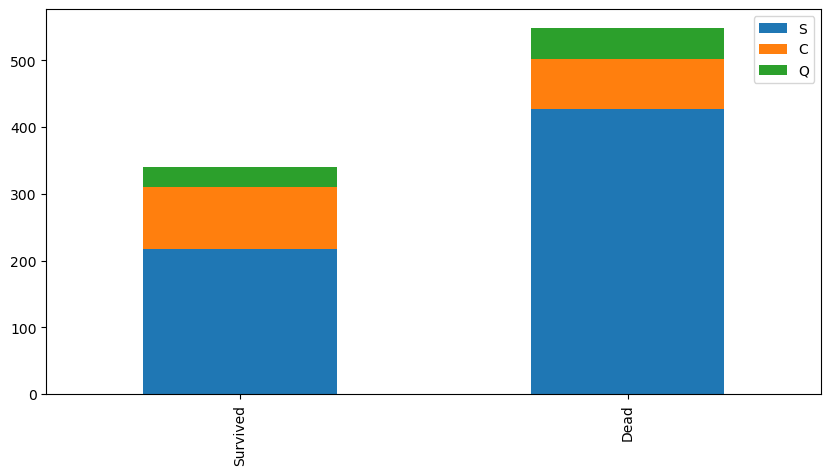

In [131]:
bar_chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

## Data Preprocessing

In [132]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [133]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [134]:
data=[train,test]
gender={'male':0,'female':1}
for dataset in data:
    dataset.Embarked=dataset.Embarked.fillna('S')
    dataset.Sex=dataset.Sex.map(gender)

In [135]:
embarkedMap={'S':0,'C':1,'Q':2}
for dataset in data:
    dataset.Embarked=dataset.Embarked.map(embarkedMap)

In [136]:
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Embarked     891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   SibSp        418 non-null    int64
 4   Parch        418 non-null    int64
 5   Embarked     418 non-null    int64
dtypes: int64(6)
memory usage: 19.7 KB
None None


## Model Building

In [137]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [138]:
predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.2, random_state=0) 

Logistic Regression

In [139]:
clf = LogisticRegression(random_state = 0) 
clf.fit(X_train, Y_train)
Y_pred  = clf.predict(X_test)
acc_log=round(clf.score(X_train,Y_train)*100,2)
print(acc_log)

80.25


Decision Tree

In [140]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

83.73


Random Forest

In [141]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

83.73


In [142]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[488,  61],
       [130, 212]], dtype=int64)

## Model Evaluation

In [143]:
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_predict

In [144]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[474,  75],
       [124, 218]], dtype=int64)

In [145]:
precision_score(Y_train,predictions)

0.7440273037542662

In [146]:
recall_score(Y_train,predictions)

0.6374269005847953

In [147]:
f1_score(Y_train,predictions)

0.6866141732283465

## Prediction

In [149]:
ids = test['PassengerId'] 
predictions = random_forest.predict(test.drop('PassengerId', axis=1))
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('resultfile.csv', index=False)
print(output.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


## Documentation

This is the Titanic Survival prediction model and the reason behind choosing Random forest is,the model's Accuracy score and the binary classification death as 0 and survived as 1 